In [1]:
## Step 1 - Reading, understanding and visualising the data

In [2662]:
#--- Import the necessary library
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [2664]:
#--- Data loading & understanding
# read the dataset day.csv
df=pd.read_csv("day.csv",low_memory=False)

# top few records of dataset
df.head()

# basic information about dataset
df.info()

# statistical details of dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [2666]:
# renaming columns for more readibility
df.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

# removing all the columns with all the values as NA
df=df.dropna(axis=1, how='all')

# removing unnecessary columns, 
# 1) instant - is index of the row 
# 2) dteday - needed date details are already available in year & month columns 
# 3) casual & registered - these columns are just the breakup of count column 

df_clean = df.drop(columns=['instant','dteday','casual','registered']).copy()

In [2668]:
# check for columns with missing values
print(df_clean.isnull().sum())

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
humidity      0
windspeed     0
cnt           0
dtype: int64


In [2672]:
# check the column details
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [2674]:
# check the dataset
df_clean.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [2676]:
# encoding/mapping columns with more meaningful labels

df_clean.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)
df_clean.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)
df_clean.month = df_clean.month.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df_clean.weekday = df_clean.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})


In [2678]:
# check the dataset
df_clean.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


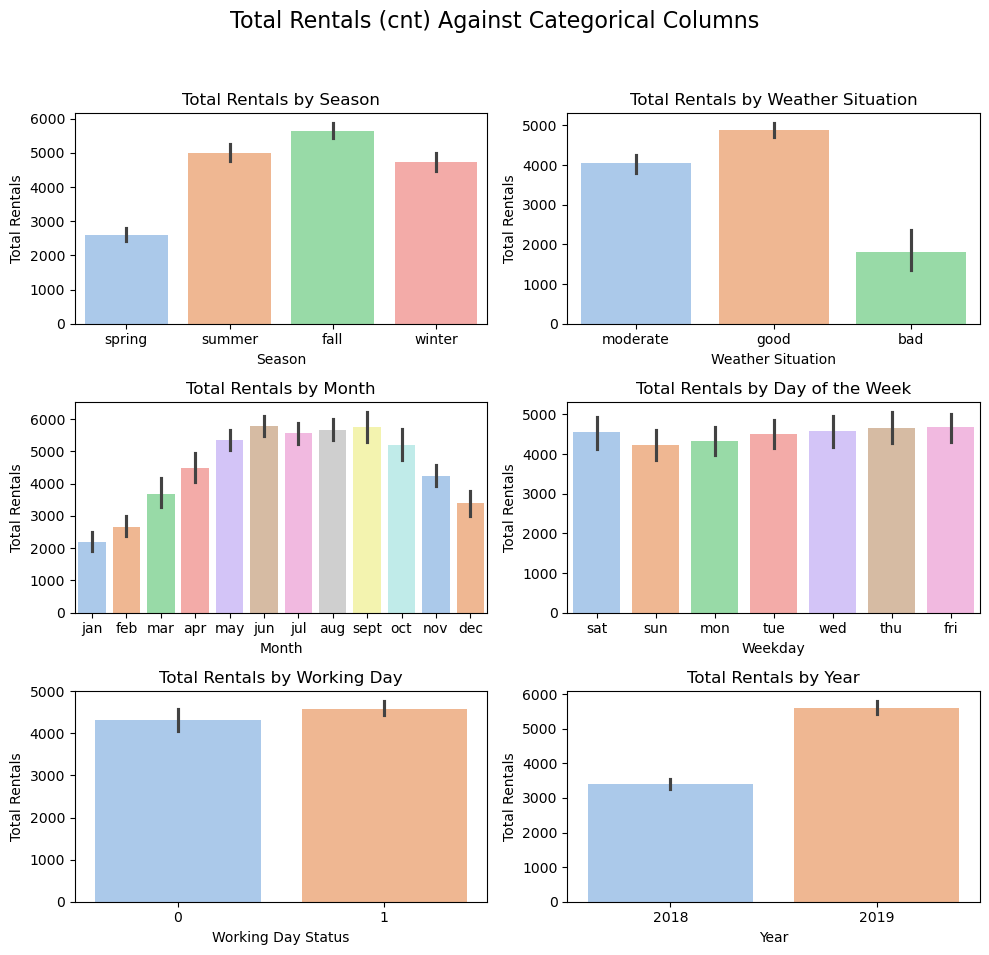

In [2680]:
#--- Visualization

# bar plot for all categorical variables against target variable 'cnt' 

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Total Rentals (cnt) Against Categorical Columns', fontsize=16)

# plot 1: total rentals by season
sns.barplot(x='season', y='cnt', data=df_clean, palette='pastel', ax=axes[0, 0])
axes[0, 0].set_title('Total Rentals by Season')
axes[0, 0].set_ylabel('Total Rentals')
axes[0, 0].set_xlabel('Season')

# plot 2: total rentals by weather situation
sns.barplot(x='weathersit', y='cnt', data=df_clean, palette='pastel', ax=axes[0, 1])
axes[0, 1].set_title('Total Rentals by Weather Situation')
axes[0, 1].set_ylabel('Total Rentals')
axes[0, 1].set_xlabel('Weather Situation')

# plot 3: total rentals by month
sns.barplot(x='month', y='cnt', data=df_clean, palette='pastel', ax=axes[1, 0])
axes[1, 0].set_title('Total Rentals by Month')
axes[1, 0].set_ylabel('Total Rentals')
axes[1, 0].set_xlabel('Month')

# plot 4: total rentals by weekday
sns.barplot(x='weekday', y='cnt', data=df_clean, palette='pastel', ax=axes[1, 1])
axes[1, 1].set_title('Total Rentals by Day of the Week')
axes[1, 1].set_ylabel('Total Rentals')
axes[1, 1].set_xlabel('Weekday')

# plot 5: total rentals by working day
sns.barplot(x='workingday', y='cnt', data=df_clean, palette='pastel', ax=axes[2, 0])
axes[2, 0].set_title('Total Rentals by Working Day')
axes[2, 0].set_ylabel('Total Rentals')
axes[2, 0].set_xlabel('Working Day Status')

# plot 6: total rentals by year
sns.barplot(x='year', y='cnt', data=df_clean, palette='pastel', ax=axes[2, 1])
axes[2, 1].set_title('Total Rentals by Year')
axes[2, 1].set_ylabel('Total Rentals')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_xticklabels(['2018', '2019'])  # 'year' 0 is for 2018 and 1 for 2019

# layout adjustment
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

<Figure size 1500x3000 with 0 Axes>

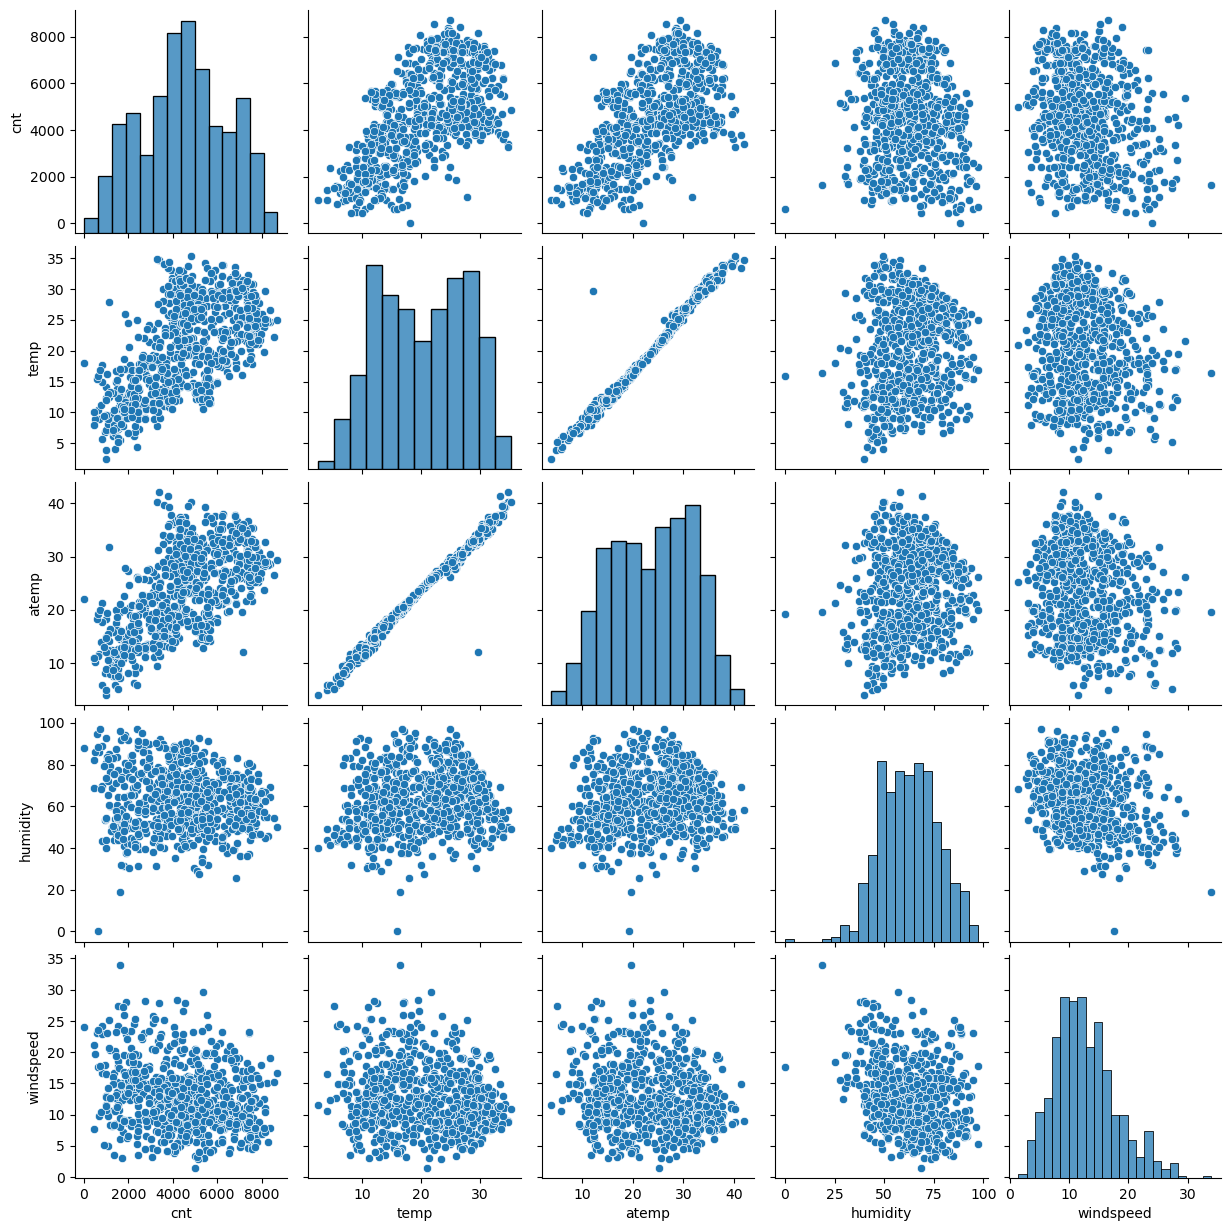

In [2682]:
# pairplot visualizing the numerical columns

plt.figure(figsize = (15,30))
sns.pairplot(data=df_clean,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

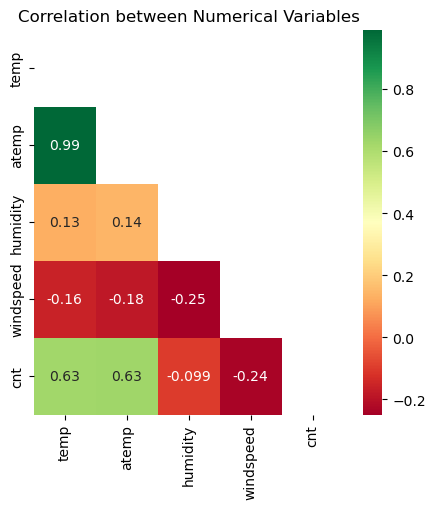

In [2684]:
# correlation between numerical columns

plt.figure(figsize = (5,5))
matrix = np.triu(df_clean[['temp','atemp','humidity','windspeed','cnt']].corr())
sns.heatmap(df[['temp','atemp','humidity','windspeed','cnt']].corr(), annot = True, cmap="RdYlGn", mask=matrix)
plt.title("Correlation between Numerical Variables")
plt.show()

In [2686]:
## Insight: 
# There is a linear relationship between temp and atemp, which leads to multicollinearity. 
# As a result, both variables cannot be included in the model. 
# We will determine which variable to retain based on their Variance Inflation Factor (VIF) and p-values in relation to the other predictors.

In [2688]:
# check the column details
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [2554]:
## Step 2- Data preparation

In [2690]:
# convert to 'category' data type
df_clean['season']=df_clean['season'].astype('category')
df_clean['weathersit']=df_clean['weathersit'].astype('category')
df_clean['month']=df_clean['month'].astype('category')
df_clean['weekday']=df_clean['weekday'].astype('category')

# creating dummy variables for categorical variables
df_clean = pd.get_dummies(df_clean, drop_first=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    bool   
 9   season_summer        730 non-null    bool   
 10  season_winter        730 non-null    bool   
 11  month_aug            730 non-null    bool   
 12  month_dec            730 non-null    bool   
 13  month_feb            730 non-null    bool   
 14  month_jan            730 non-null    bool   
 15  month_jul            730 non-null    boo

In [2692]:
# changing the boolean datatype to int
df_clean = df_clean.astype({col: 'int' for col in df_clean.columns if df_clean[col].dtype == 'bool'})
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   humidity             730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    int32  
 9   season_summer        730 non-null    int32  
 10  season_winter        730 non-null    int32  
 11  month_aug            730 non-null    int32  
 12  month_dec            730 non-null    int32  
 13  month_feb            730 non-null    int32  
 14  month_jan            730 non-null    int32  
 15  month_jul            730 non-null    int

In [2694]:
# shape of dataset
df_clean.shape

(730, 30)

In [2696]:
# top few records of dataset
df_clean.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
## Step 3- Splitting the dataset to train & test dataset

In [2698]:
np.random.seed(0)
df_train, df_test = train_test_split(df_clean, train_size = 0.70, test_size = 0.30, random_state = 100)

In [2700]:
# checking shape of train & test dataset
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [2702]:
# using MinMaxScaler to rescaling the features
scaler = MinMaxScaler()

# checking the dataset before scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [2704]:
# applying scaler() to numeric variables
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

# checking the dataset after scaling
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [2706]:
# statistical details of dataset
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


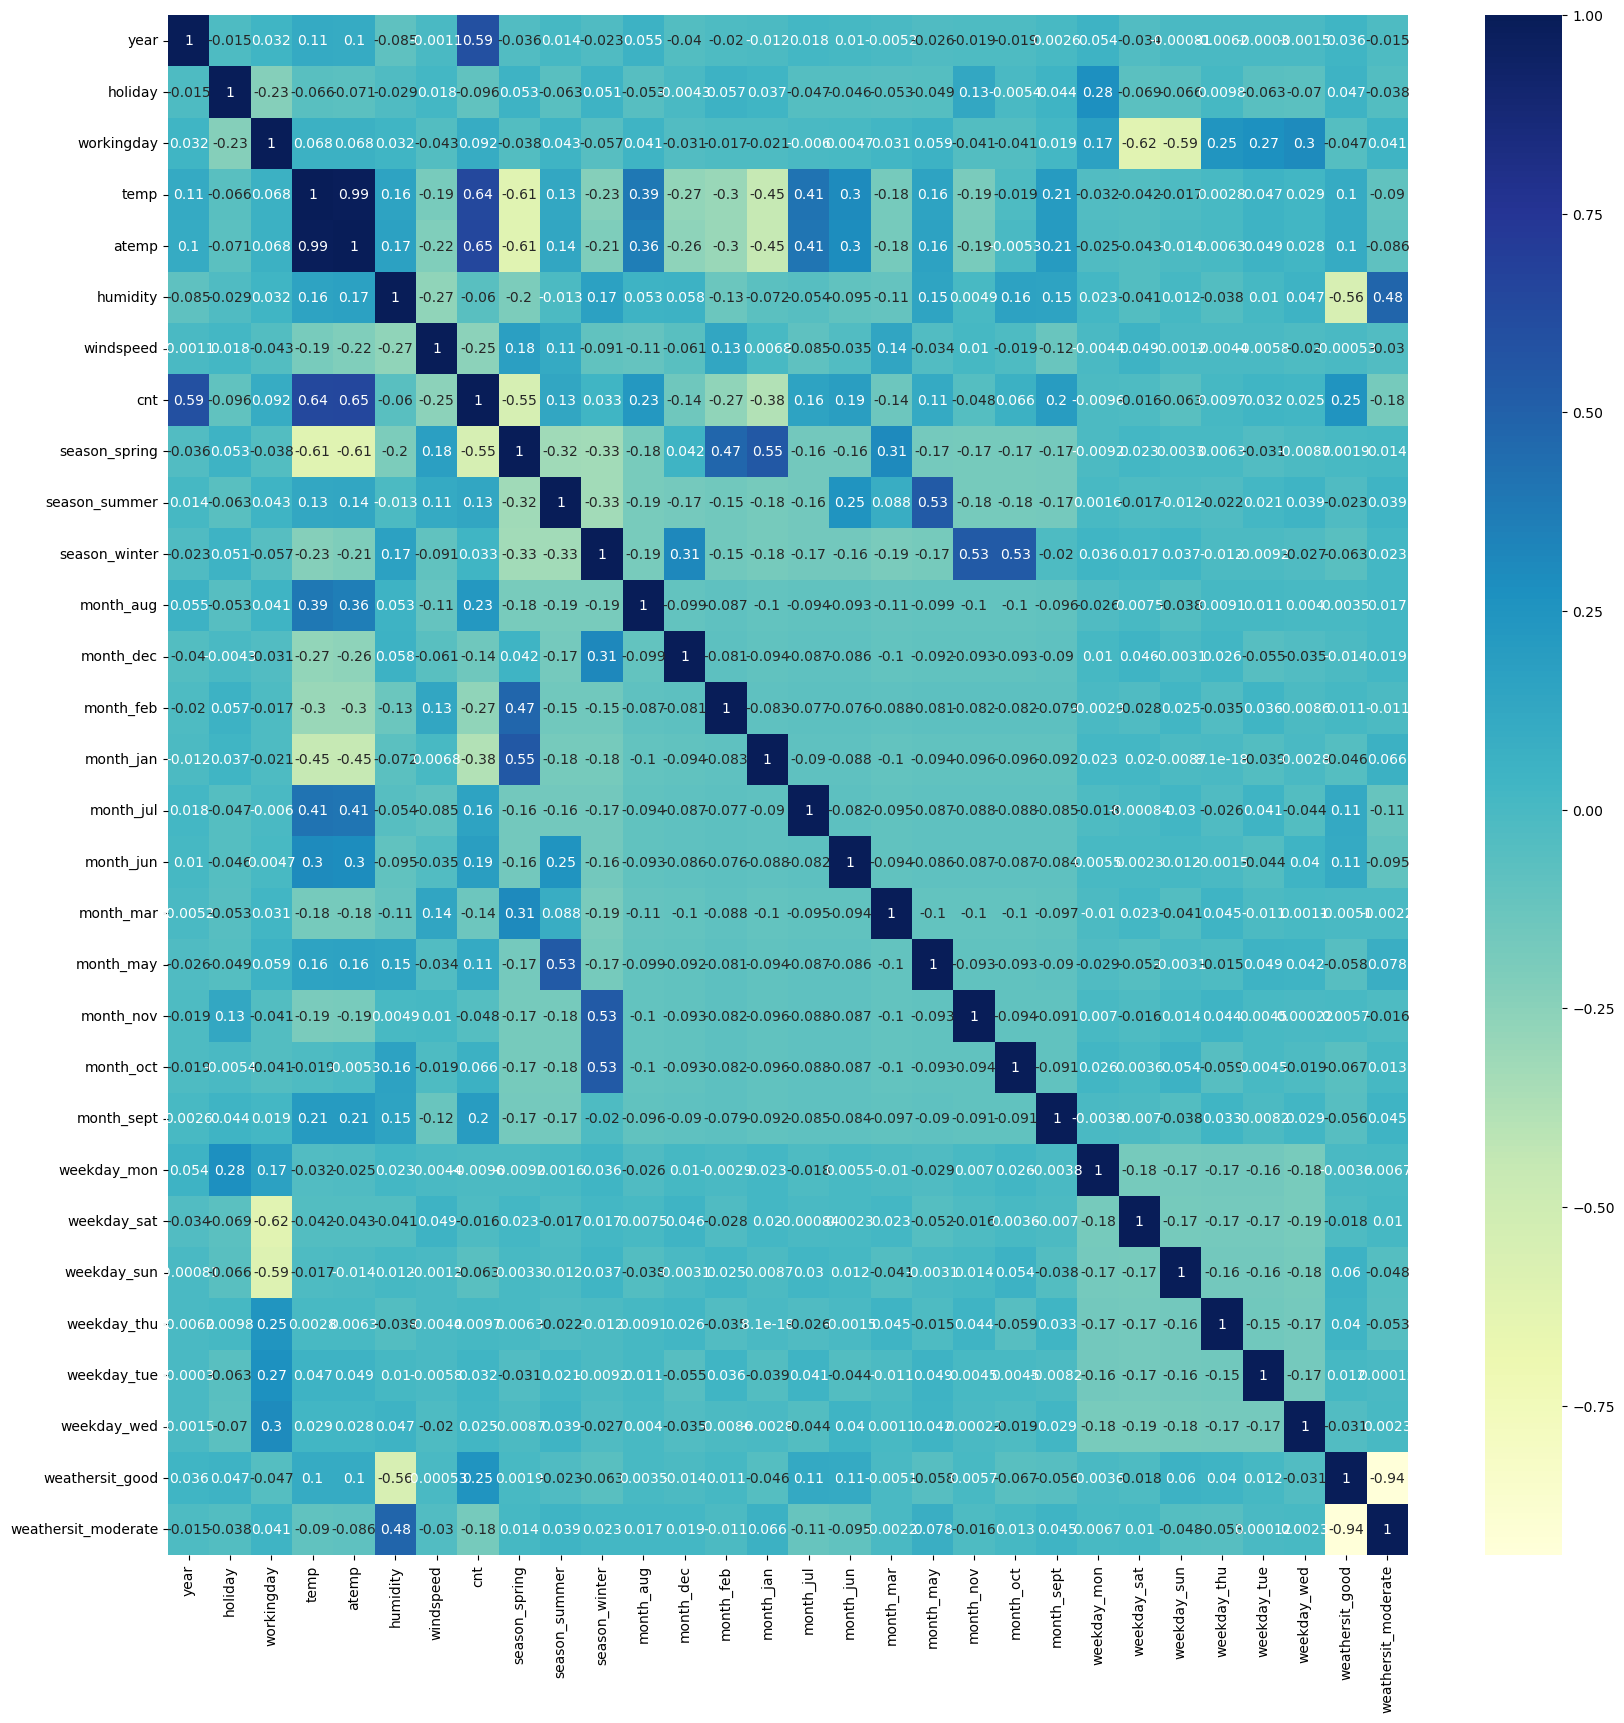

In [2708]:
# checking if the variables are highly correlated

plt.figure(figsize = (20,20))  
sns.heatmap(df_train.corr(), annot = True,cmap="YlGnBu")
plt.show()

In [ ]:
## Step 4- Building model

In [2710]:
# linear model
y_train = df_train.pop('cnt')
X_train = df_train

In [2712]:
# RFE [Recursive feature elimination]
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

# list of variables selected
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('month_aug', False, 7),
 ('month_dec', False, 3),
 ('month_feb', False, 4),
 ('month_jan', True, 1),
 ('month_jul', True, 1),
 ('month_jun', False, 14),
 ('month_mar', False, 12),
 ('month_may', False, 6),
 ('month_nov', False, 2),
 ('month_oct', False, 11),
 ('month_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 8),
 ('weekday_thu', False, 15),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [2714]:
# columns selected through RFE in col 
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'month_jan',
       'month_jul', 'month_sept', 'weekday_sat', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [2716]:
# rejected columns
X_train.columns[~rfe.support_]

Index(['atemp', 'month_aug', 'month_dec', 'month_feb', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [2718]:
# function to calculate VIF of variables

def getVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [2720]:
# creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [2722]:
##-- Model 1: All columns selected by RFE

X_train_lm_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lm_1).fit()
print(lr_1.summary())
getVIF(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          2.31e-191
Time:                        13:23:10   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0023    

,Features,VIF
4,humidity,25.64
3,temp,22.83
13,weathersit_good,14.85
14,weathersit_moderate,9.02
6,season_spring,5.69
2,workingday,5.42
5,windspeed,4.68
8,season_winter,4.14
7,season_summer,3.20
0,year,2.10


In [2724]:
##-- Model 2: 
# Removing the variable 'humidity' based on its High VIF
X_train_new = X_train_rfe.drop(["humidity"], axis = 1)

X_train_lm_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lm_2).fit()
print(lr_2.summary())

getVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          7.33e-189
Time:                        13:23:19   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1181    

,Features,VIF
12,weathersit_good,14.84
3,temp,13.95
13,weathersit_moderate,8.43
2,workingday,5.34
4,windspeed,4.67
5,season_spring,4.48
6,season_summer,2.77
7,season_winter,2.76
0,year,2.08
11,weekday_sat,1.99


In [2726]:
##-- Model 3
# Removing the variable 'weathersit_good' due to its high P value

X_train_new = X_train_new.drop(["weathersit_good"], axis = 1)

X_train_lm_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lm_3).fit()
print(lr_3.summary())

getVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.51e-162
Time:                        13:24:12   Log-Likelihood:                 445.79
No. Observations:                 510   AIC:                            -863.6
Df Residuals:                     496   BIC:                            -804.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1650    

,Features,VIF
3,temp,7.06
2,workingday,5.22
4,windspeed,4.62
5,season_spring,3.07
6,season_summer,2.33
0,year,2.07
7,season_winter,1.97
11,weekday_sat,1.96
8,month_jan,1.62
9,month_jul,1.59


In [2728]:
##-- Model 4
# Removing the variable 'holiday' due to its high P value

X_train_new = X_train_new.drop(["holiday"], axis = 1)

X_train_lm_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lm_4).fit()
print(lr_4.summary())

getVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.1
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          3.91e-163
Time:                        13:24:32   Log-Likelihood:                 444.53
No. Observations:                 510   AIC:                            -863.1
Df Residuals:                     497   BIC:                            -808.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1581    

,Features,VIF
2,temp,6.81
1,workingday,4.66
3,windspeed,4.60
4,season_spring,2.99
5,season_summer,2.31
0,year,2.07
6,season_winter,1.91
10,weekday_sat,1.83
7,month_jan,1.62
8,month_jul,1.59


In [2730]:
##-- Model 5
# Removing the variable 'season_spring' due to its high P value

X_train_new = X_train_new.drop(["season_spring"], axis = 1)

X_train_lm_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lm_5).fit()
print(lr_5.summary())

getVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     174.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          3.75e-163
Time:                        13:24:41   Log-Likelihood:                 441.89
No. Observations:                 510   AIC:                            -859.8
Df Residuals:                     498   BIC:                            -809.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0983    

,Features,VIF
2,temp,6.63
1,workingday,4.28
3,windspeed,3.54
0,year,2.04
4,season_summer,1.82
9,weekday_sat,1.75
5,season_winter,1.53
7,month_jul,1.53
10,weathersit_moderate,1.53
6,month_jan,1.29


In [2732]:
##-- Model 6
# Removing the variable 'month_jan' due to its high P value

X_train_new = X_train_new.drop(["month_jan"], axis = 1)

X_train_lm_6 = sm.add_constant(X_train_new)
lr_6 = sm.OLS(y_train,X_train_lm_6).fit()
print(lr_6.summary())

getVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     190.9
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.94e-163
Time:                        13:24:52   Log-Likelihood:                 439.84
No. Observations:                 510   AIC:                            -857.7
Df Residuals:                     499   BIC:                            -811.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0750    

,Features,VIF
2,temp,6.34
1,workingday,4.04
3,windspeed,3.41
0,year,2.01
4,season_summer,1.75
8,weekday_sat,1.69
6,month_jul,1.53
9,weathersit_moderate,1.51
5,season_winter,1.45
7,month_sept,1.28


In [2734]:
##-- Model 7
# Removing the variable 'month_jul' due to its high P value

X_train_new = X_train_new.drop(["month_jul"], axis = 1)

X_train_lm_7 = sm.add_constant(X_train_new)
lr_7 = sm.OLS(y_train,X_train_lm_7).fit()
print(lr_7.summary())

getVIF(X_train_new)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.3
Date:                Tue, 05 Nov 2024   Prob (F-statistic):          1.01e-163
Time:                        13:25:01   Log-Likelihood:                 437.74
No. Observations:                 510   AIC:                            -855.5
Df Residuals:                     500   BIC:                            -813.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0788    

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.39
0,year,2.01
7,weekday_sat,1.68
4,season_summer,1.57
8,weathersit_moderate,1.50
5,season_winter,1.38
6,month_sept,1.20


In [2624]:
#-- Insight

# 1)
# This model appears to be solid, with very low multicollinearity among the predictors and significant p-values for all variables. 
# For now, we will consider it as our final model, unless the metrics on the test data show a substantial deviation from these results.

# 2) [coefficient values]
# const                   0.0788
# year                    0.2389
# workingday              0.0482
# temp                    0.5515
# windspeed              -0.1839
# season_summer           0.0875
# season_winter           0.1174
# month_sept              0.0874
# weekday_sat             0.0593
# weathersit_moderate    -0.0677
# It is evident that none of our coefficients are equal to zero, which means we can reject the null hypothesis that all coefficients are zero.

# 3)
# F-statistic:                     210.3
# Prob (F-statistic):          1.01e-163

# F-statistic of 210.3 is quite high, suggesting that the model is a good fit for the data and 
# that at least some of the predictors are meaningfully contributing to explaining the dependent variable.
# Also
# The p-value of approximately 0.0000 indicates that the overall model is statistically significant.                                                                                                              

In [ ]:
## Step 5- Residual analysis of train data & validation

In [2736]:
#-- residual analysis of train data & validation
X_train_lm_7

,const,year,workingday,temp,windspeed,season_summer,season_winter,month_sept,weekday_sat,weathersit_moderate
653,1.0,1,1,0.509887,0.300794,0,1,0,0,0
576,1.0,1,1,0.815169,0.264686,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,1,1
728,1.0,1,0,0.245101,0.663106,0,0,0,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0.824514,0.355596,1,0,0,0,1
578,1.0,1,1,0.863973,0.187140,0,0,0,0,0
53,1.0,0,1,0.202618,0.111379,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,1,1


In [2738]:
y_train_pred = lr_7.predict(X_train_lm7)

Text(0.5, 0, 'Errors')

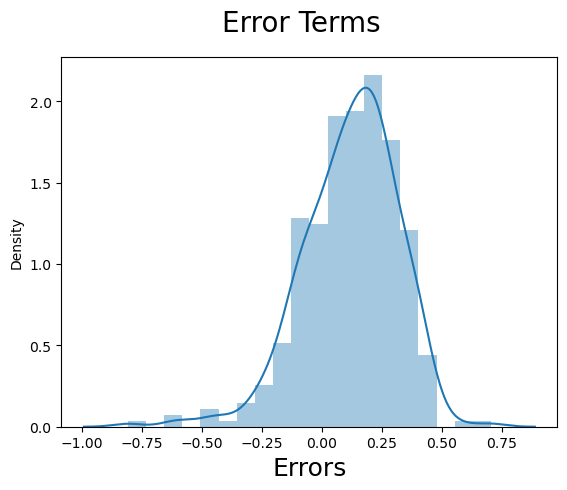

In [2740]:
# plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

In [2476]:
#-- Insight 
# Above histogram shows Error terms are following normal distribution

In [2742]:
#-- checking multi colinearity
getVIF(X_train_new)

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.39
0,year,2.01
7,weekday_sat,1.68
4,season_summer,1.57
8,weathersit_moderate,1.50
5,season_winter,1.38
6,month_sept,1.20


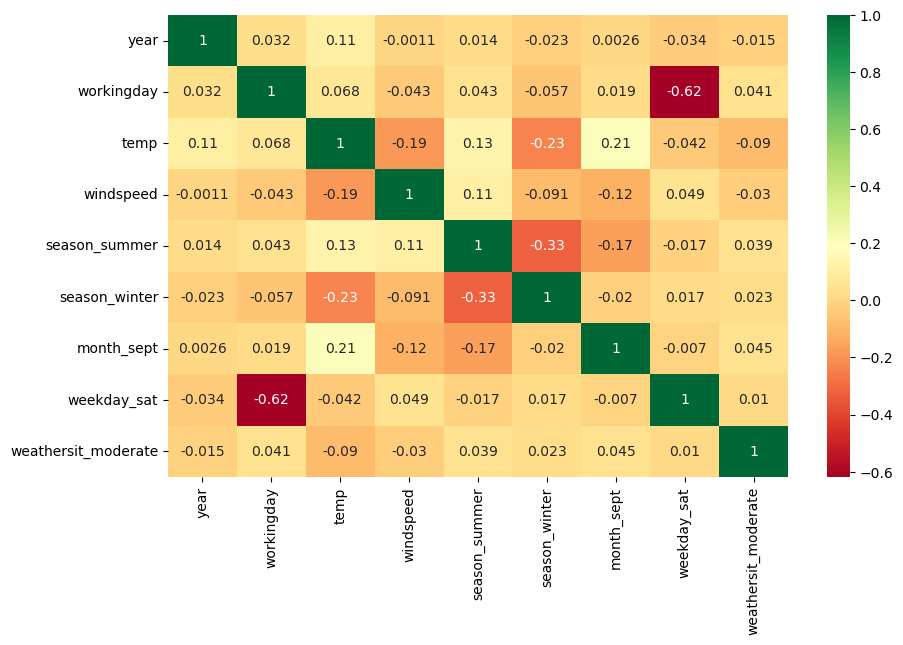

In [2744]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn")
plt.show()

In [2746]:
#-- Insight
# The VIF values are all below 5, indicating that multicollinearity is not a concern. 
# Additionally, the heatmap shows no significant correlation between the variables, further supporting the absence of multicollinearity.


In [2748]:
## Step 6- Making prediction

In [2750]:
#--- making predictions on model 7

# scaling on test dataset
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,season_spring,season_summer,...,month_oct,month_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,1,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,1,0


In [2752]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 219 non-null    int64  
 1   holiday              219 non-null    int64  
 2   workingday           219 non-null    int64  
 3   temp                 219 non-null    float64
 4   atemp                219 non-null    float64
 5   humidity             219 non-null    float64
 6   windspeed            219 non-null    float64
 7   season_spring        219 non-null    int32  
 8   season_summer        219 non-null    int32  
 9   season_winter        219 non-null    int32  
 10  month_aug            219 non-null    int32  
 11  month_dec            219 non-null    int32  
 12  month_feb            219 non-null    int32  
 13  month_jan            219 non-null    int32  
 14  month_jul            219 non-null    int32  
 15  month_jun            219 non-null    int32  

In [2754]:
# selecting the columns present in the final model
col1=X_train_new.columns
X_test=X_test[col1]

# adding constant variable to test dataframe
X_test_lm7 = sm.add_constant(X_test)

In [2756]:
y_pred = lr_7.predict(X_test_lm7)

In [2758]:
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7692

In [ ]:
## Step 7 - Model evaluation

Text(0, 0.5, 'y_pred')

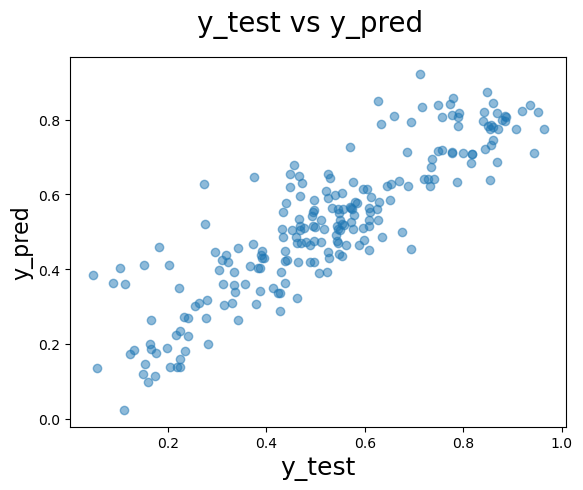

In [2764]:
#--- model evaluation

# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              #-- plot heading 
plt.xlabel('y_test', fontsize = 18)                          #-- X-label
plt.ylabel('y_pred', fontsize = 16)

In [2766]:
round(lr_7.params,4)

const                  0.0788
year                   0.2389
workingday             0.0482
temp                   0.5515
windspeed             -0.1839
season_summer          0.0875
season_winter          0.1174
month_sept             0.0874
weekday_sat            0.0593
weathersit_moderate   -0.0677
dtype: float64

In [2768]:
# calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7592


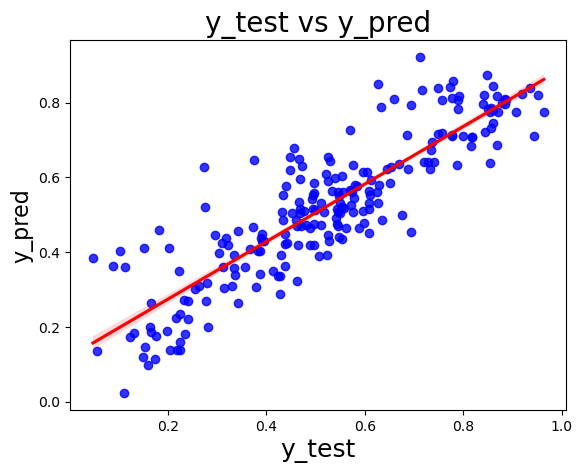

In [2770]:
# visualizing the fit on the test data, plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [2772]:
##-- Final result comparison
#- Train dataset R^2          : 0.791
#- Test dataset R^2           : 0.7692
#- Train dataset Adjusted R^2 : 0.787    
#- Test dataset Adjusted R^2  : 0.7592

In [2774]:
#-- Insight
# Model Performance: The model explains a large portion of the variance both in the training and test data, with very similar performance on both sets,
# indicating good generalization.
#
# Overfitting: The slight decrease in performance on the test set (from 79.1% to 76.92%) is expected and is not concerning. 
# This suggests that the model is not overfitting, as the difference between train and test performance is relatively small.
#
# Adjusted R² Consistency: The consistency between Adjusted R² on both training and test datasets further confirms
# that the model is not overly complex and is effectively capturing the key patterns in the data.


In [2776]:
#-- Conclusion
# These results suggest that the model is robust and well-calibrated, capturing a significant portion of the variance in both
# the training and test datasets. The slight decrease in R² between the training and test sets is expected 
# and does not indicate overfitting. Overall, the model appears to be reliable and should generalize effectively to new, unseen data.
